In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Problem 1

In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Data type : ", type(train))
print("Data dims : ", train.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [5]:
centair = pd.DataFrame(train["CentralAir"]) #response
saleprice = pd.DataFrame(train["SalePrice"])#predictor

In [6]:
saleprice_train, saleprice_test, centair_train, centair_test = train_test_split(saleprice, centair, test_size = 0.25)

# Check the sample sizes
print("Train Set :", centair_train.shape, saleprice_train.shape)
print("Test Set  :", centair_test.shape, saleprice_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


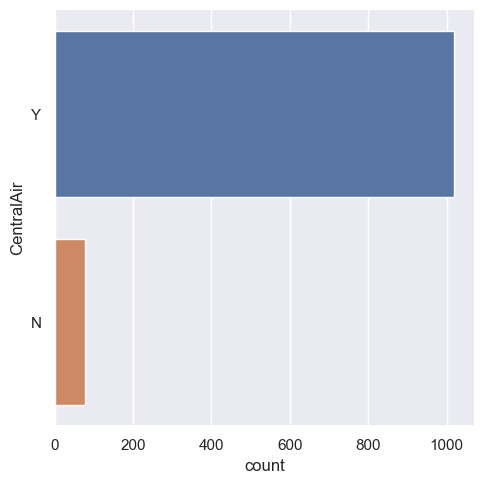

In [7]:
# Count Plot for centair Train
sb.catplot(y = "CentralAir", data = centair_train, kind = "count")

<Axes: >

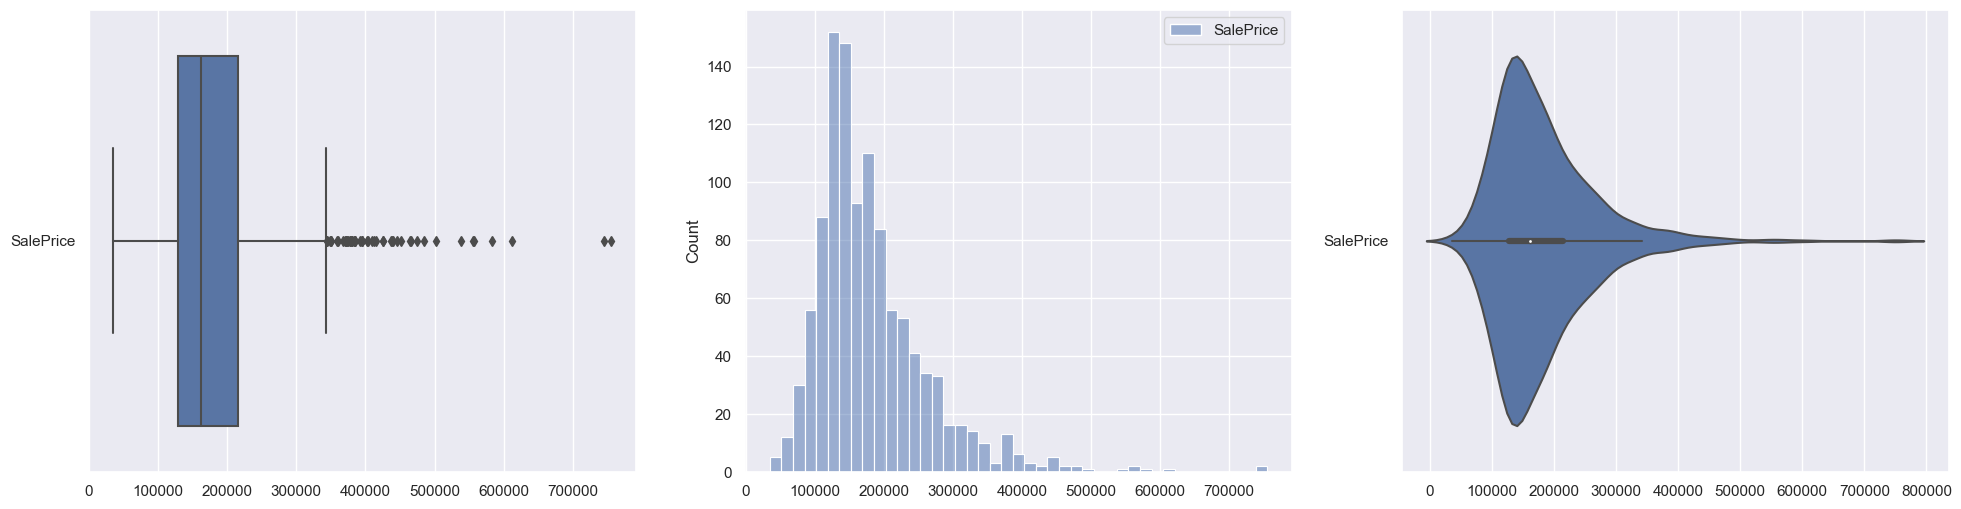

In [8]:
# Plot the distributions of saleprice Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = saleprice_train, orient = "h", ax = axes[0])
sb.histplot(data = saleprice_train, ax = axes[1])
sb.violinplot(data = saleprice_train, orient = "h", ax = axes[2])

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

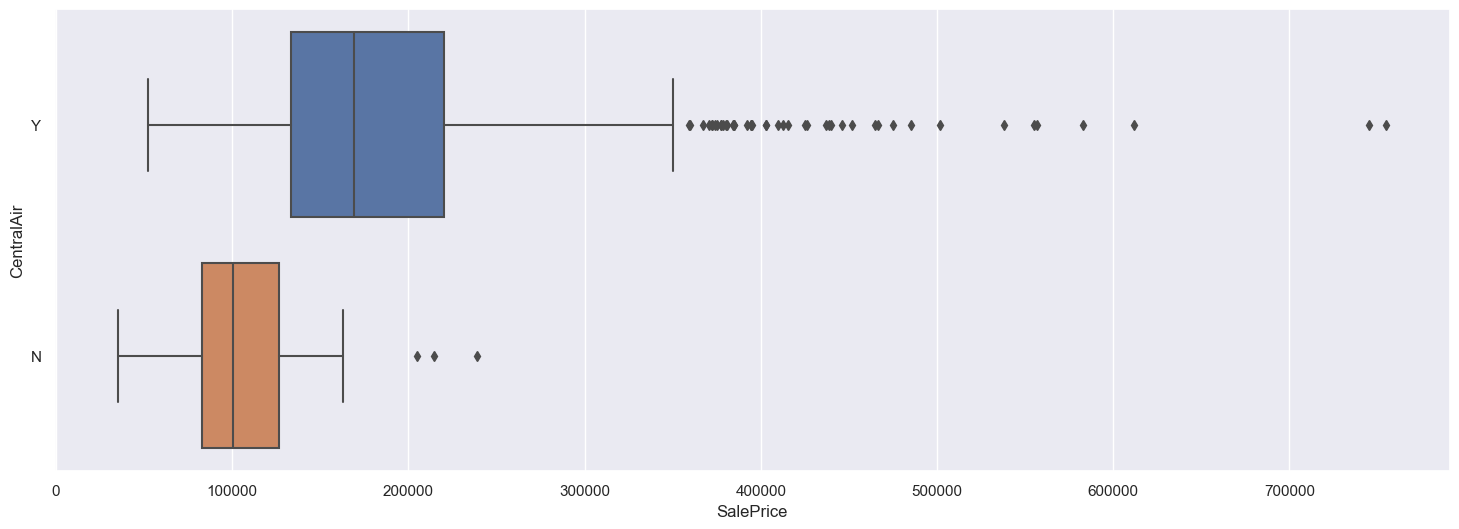

In [9]:
# Create a joint dataframe by concatenating saleprice and centralair
trainDF = pd.concat([saleprice_train, centair_train], axis = 1).reindex(saleprice_train.index)

# Joint Boxplot of saleprice Train against centralair Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

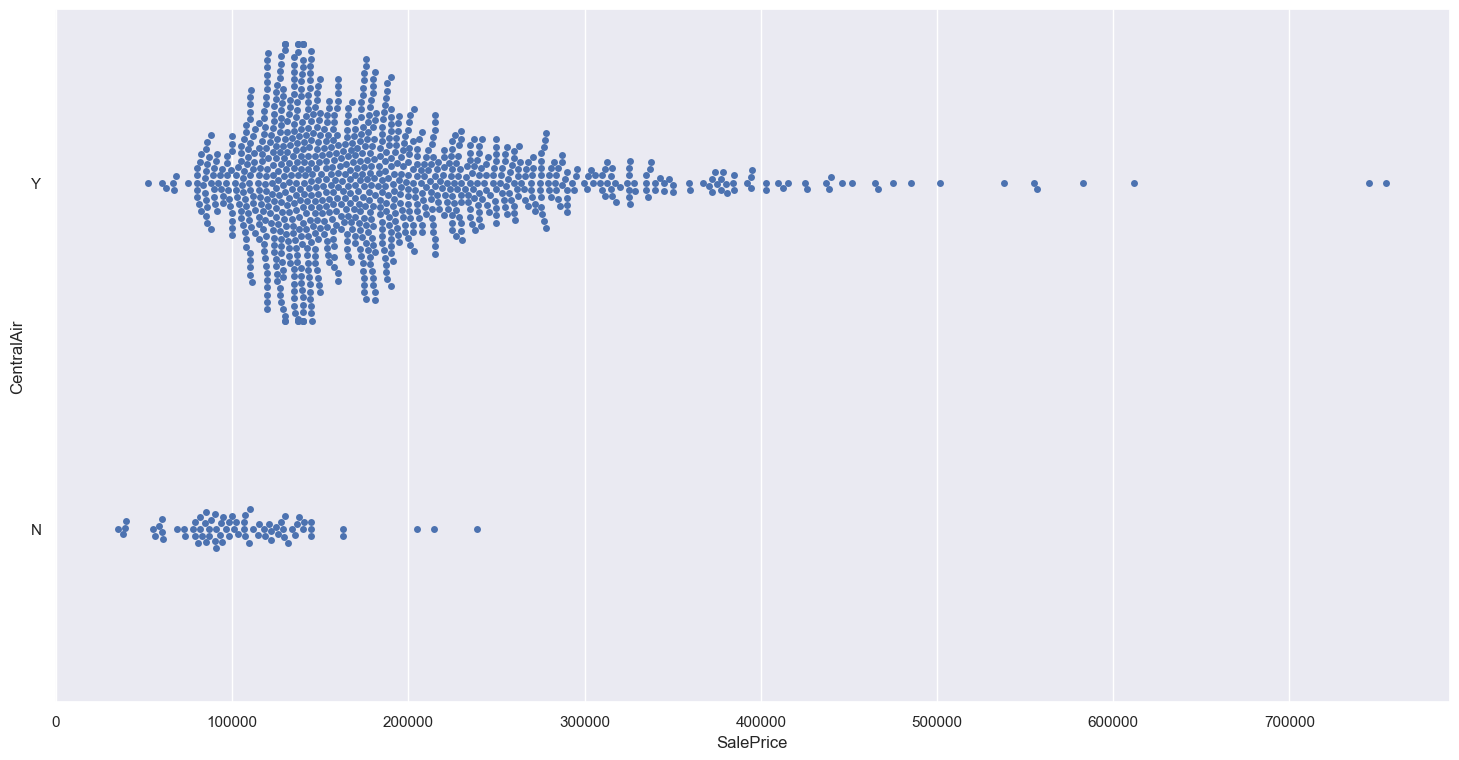

In [10]:
# Create a joint dataframe by concatenating saleprice and centair
trainDF = pd.concat([saleprice_train, centair_train], axis = 1).reindex(saleprice_train.index)

# Joint Swarmplot of OverallQual Train against Centair Train
f = plt.figure(figsize=(18, 9))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

## A & B

### Classification Tree Models Max depth 3

Classification Accuracy 	: 0.9442922374429223
True Positive Rate 		: 0.9922178988326849
False Positive Rate 		: 0.7910447761194029
F1-score 		: 0.9709662065683008

Classification Accuracy 	: 0.9342465753424658
True Positive Rate 		: 0.9910979228486647
False Positive Rate 		: 0.75
F1-score 		: 0.9653179190751445



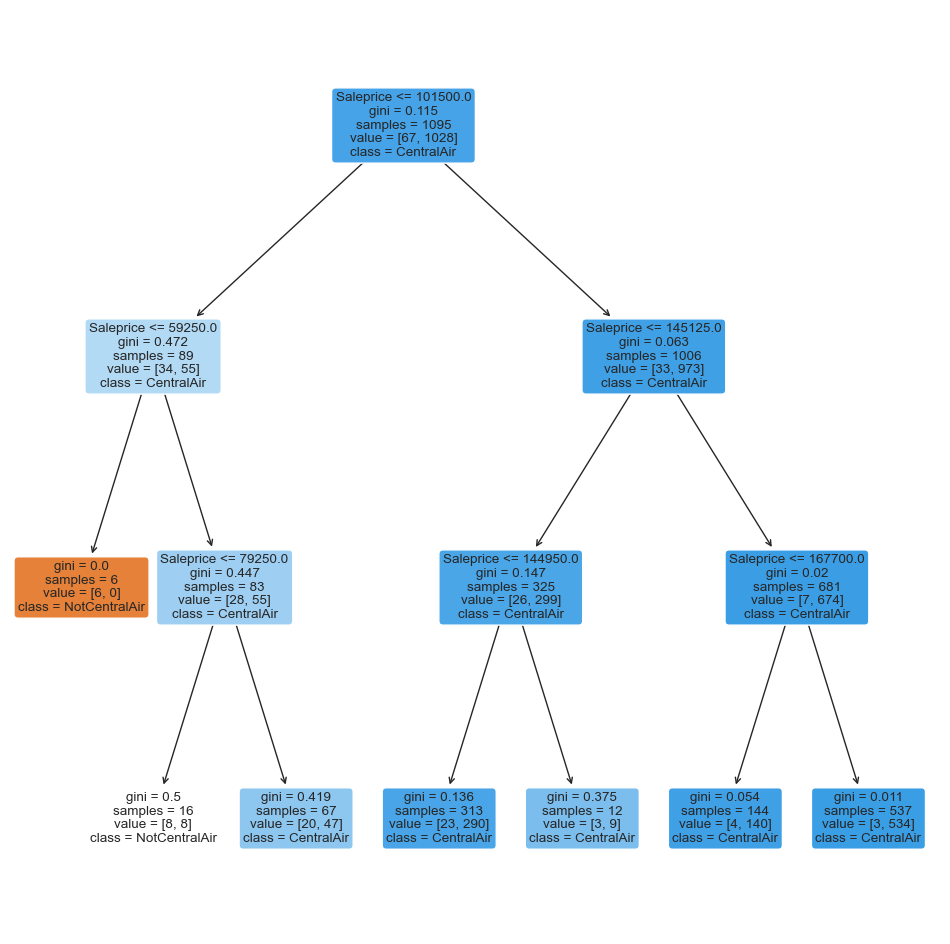

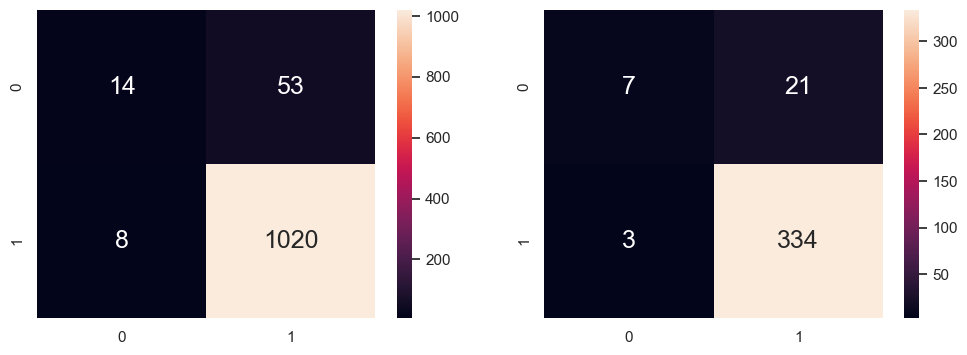

In [61]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(saleprice_train, centair_train)      # train the decision tree model

# Predict CentralAir values corresponding to Total
centair_train_pred = dectree.predict(saleprice_train)
centair_test_pred = dectree.predict(saleprice_test)

# Plot the trained Decision Tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Saleprice"], 
          class_names=["NotCentralAir","CentralAir"])

# Plot the Confusion Matrix for Train and Test
cm_train = confusion_matrix(centair_train, centair_train_pred)
cm_test = confusion_matrix(centair_test, centair_test_pred)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

TN_train = cm_train[0][0]
TP_train = cm_train[1][1]
FN_train = cm_train[1][0]
FP_train = cm_train[0][1]

TN_test = cm_test[0][0]
TP_test = cm_test[1][1]
FN_test = cm_test[1][0]
FP_test = cm_test[0][1]

# Train Data
print("Classification Accuracy \t:", dectree.score(saleprice_train, centair_train))
print("True Positive Rate \t\t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t\t:", FP_train/(FP_train + TN_train))
print("F1-score \t\t:", 2*TP_train/(2*TP_train + FP_train + FN_train))
print()

# Test Data
print("Classification Accuracy \t:", dectree.score(saleprice_test, centair_test))
print("True Positive Rate \t\t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t\t:", FP_test/(FP_test + TN_test))
print("F1-score \t\t:", 2*TP_test/(2*TP_test + FP_test + FN_test))
print()

### Classification Tree Models Max Depth 4

Classification Accuracy 	: 0.947945205479452
True Positive Rate 		: 0.9961089494163424
False Positive Rate 		: 0.7910447761194029
F1-score 		: 0.9729216152019002

Classification Accuracy 	: 0.9287671232876712
True Positive Rate 		: 0.9910979228486647
False Positive Rate 		: 0.8214285714285714
F1-score 		: 0.962536023054755



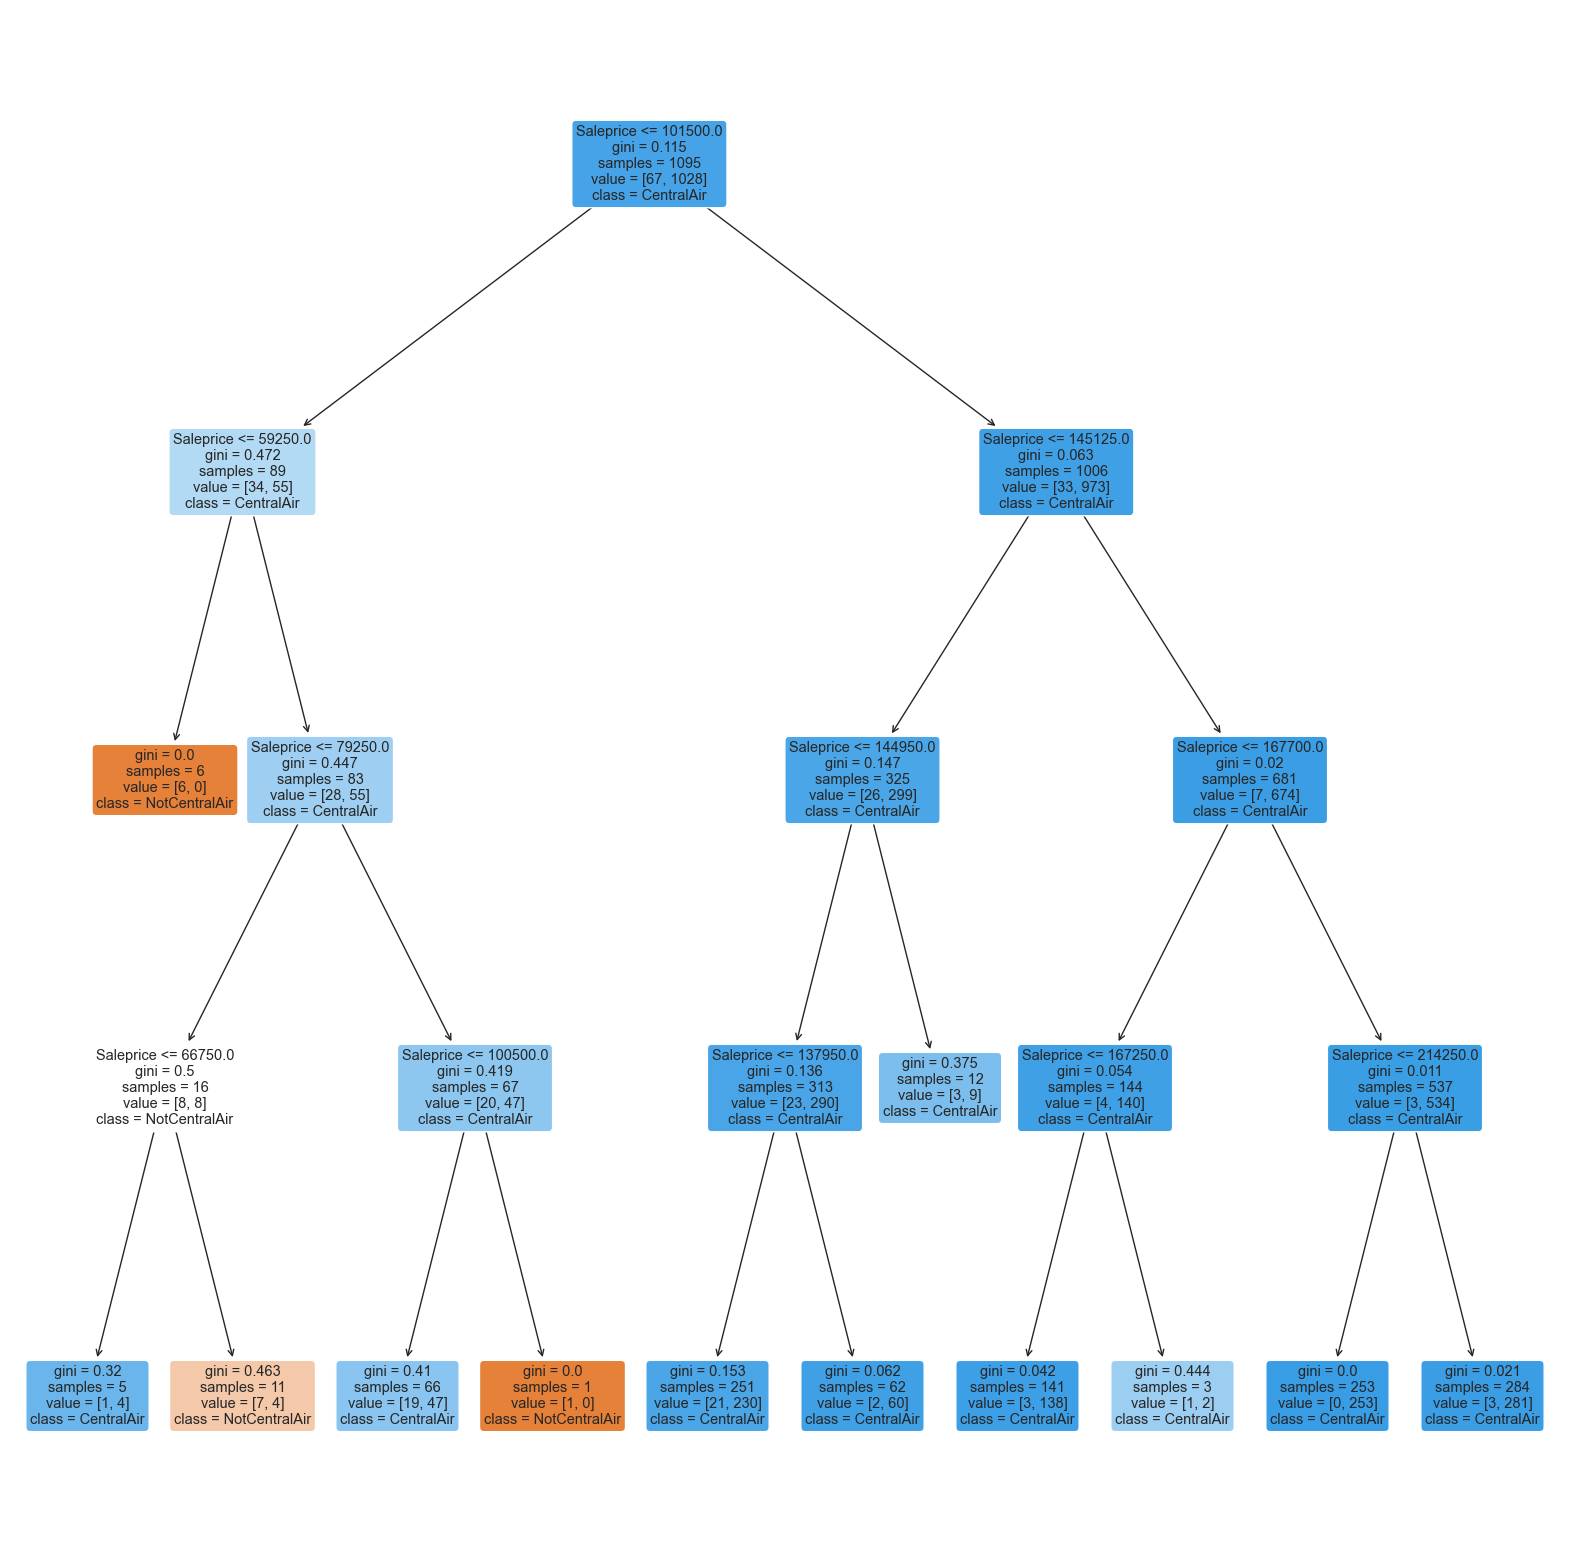

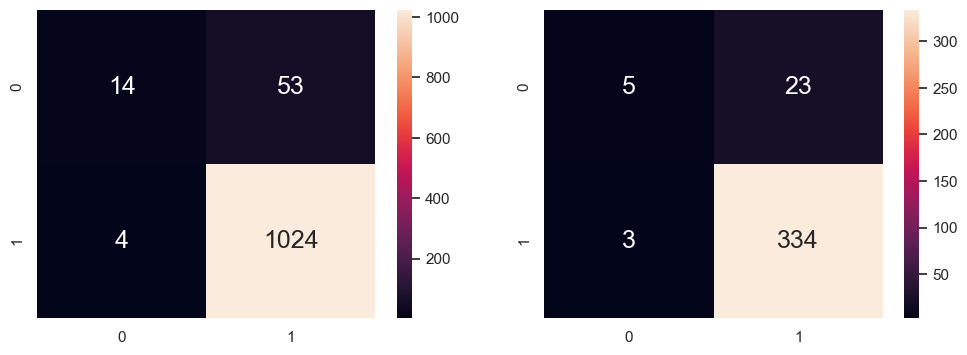

In [62]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(saleprice_train, centair_train)      # train the decision tree model

# Predict CentralAir values corresponding to SalePrice
centair_train_pred = dectree.predict(saleprice_train)
centair_test_pred = dectree.predict(saleprice_test)

# Plot the trained Decision Tree

f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Saleprice"], 
          class_names=["NotCentralAir","CentralAir"])

# Plot the Confusion Matrix for Train and Test
cm_train = confusion_matrix(centair_train, centair_train_pred)
cm_test = confusion_matrix(centair_test, centair_test_pred)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

TN_train = cm_train[0][0]
TP_train = cm_train[1][1]
FN_train = cm_train[1][0]
FP_train = cm_train[0][1]

TN_test = cm_test[0][0]
TP_test = cm_test[1][1]
FN_test = cm_test[1][0]
FP_test = cm_test[0][1]

# Train Data
print("Classification Accuracy \t:", dectree.score(saleprice_train, centair_train))
print("True Positive Rate \t\t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t\t:", FP_train/(FP_train + TN_train))
print("F1-score \t\t:", 2*TP_train/(2*TP_train + FP_train + FN_train))
print()

# Test Data
print("Classification Accuracy \t:", dectree.score(saleprice_test, centair_test))
print("True Positive Rate \t\t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t\t:", FP_test/(FP_test + TN_test))
print("F1-score \t\t:", 2*TP_test/(2*TP_test + FP_test + FN_test))
print()

### According to the metrics calculated for both models (depth 3 and depth 4), depth 3 is a more accurate model. This is because the accuracy for depth 3 is slightly higher (0.934 vs 0.929) and its FPR is much lower margin (0.75 vs 0.821). The TPR of model 3 is approximately the same (0.991 vs 0.991). Overall, another metric is calculated, which is F1 score, which results in the same conclusion that depth 3 model has a higher score than that of depth 4 model (0.965 vs 0.963)

# Problem 2

## OverallQual

### Data Visualization

In [11]:
y = pd.DataFrame(train["CentralAir"]) #response
X = pd.DataFrame(train["OverallQual"])#predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<Axes: >

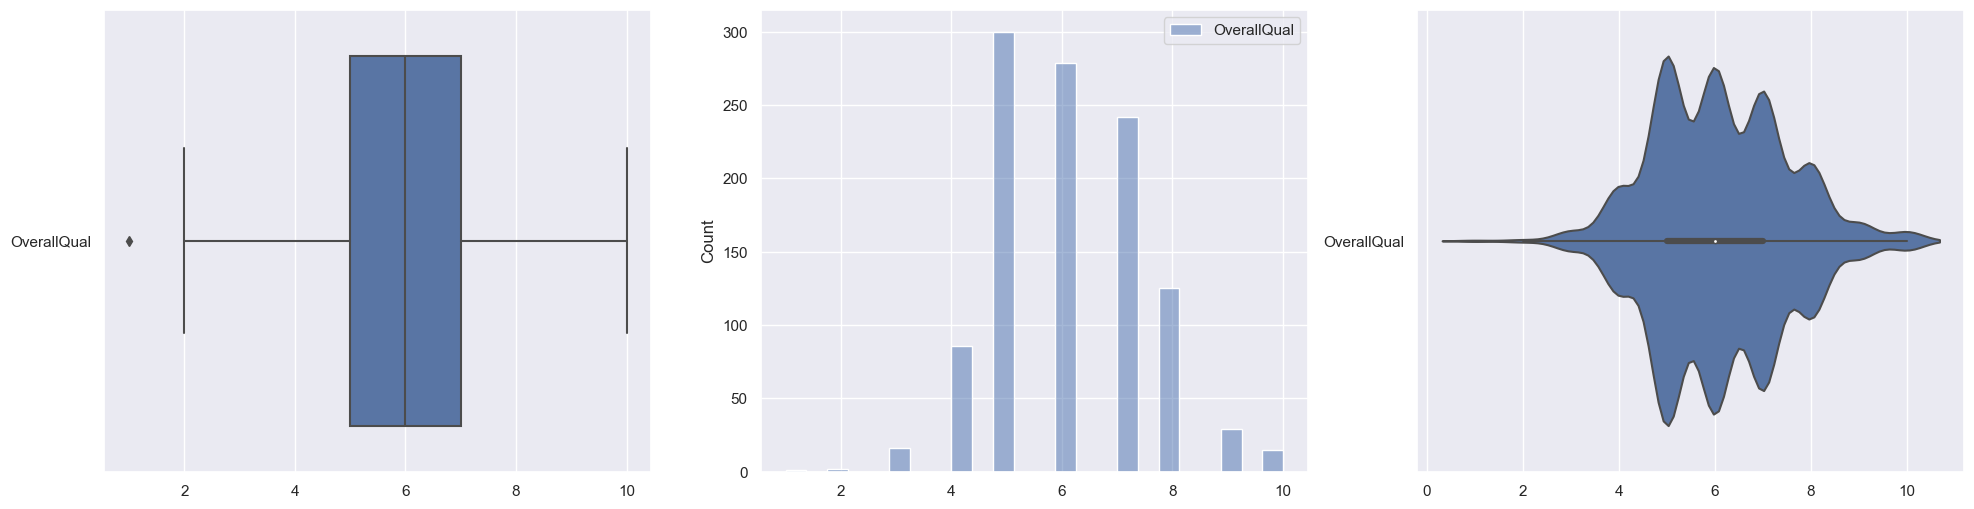

In [12]:
# Plot the distributions of OverallQual Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = X_train, orient = "h", ax = axes[0])
sb.histplot(data = X_train, ax = axes[1])
sb.violinplot(data = X_train, orient = "h", ax = axes[2])

<Axes: xlabel='OverallQual', ylabel='CentralAir'>

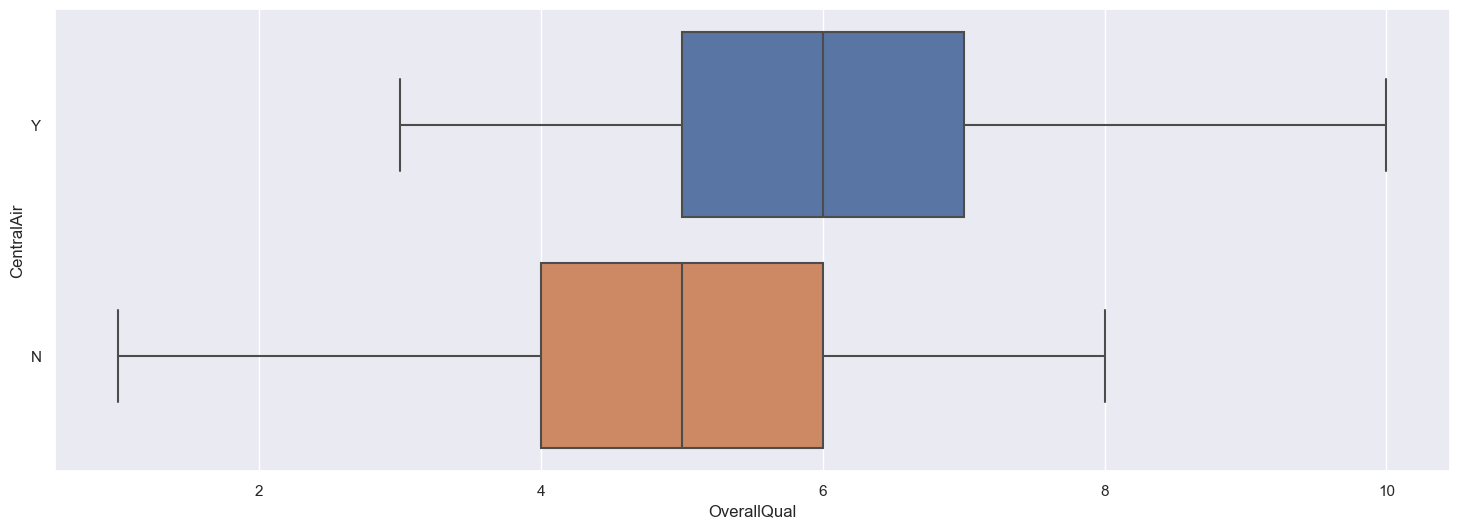

In [13]:
# Create a joint dataframe by concatenating OverallQual and centralair
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Joint Boxplot of OverallQual Train against centralair Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = trainDF, orient = "h")

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='OverallQual', ylabel='CentralAir'>

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


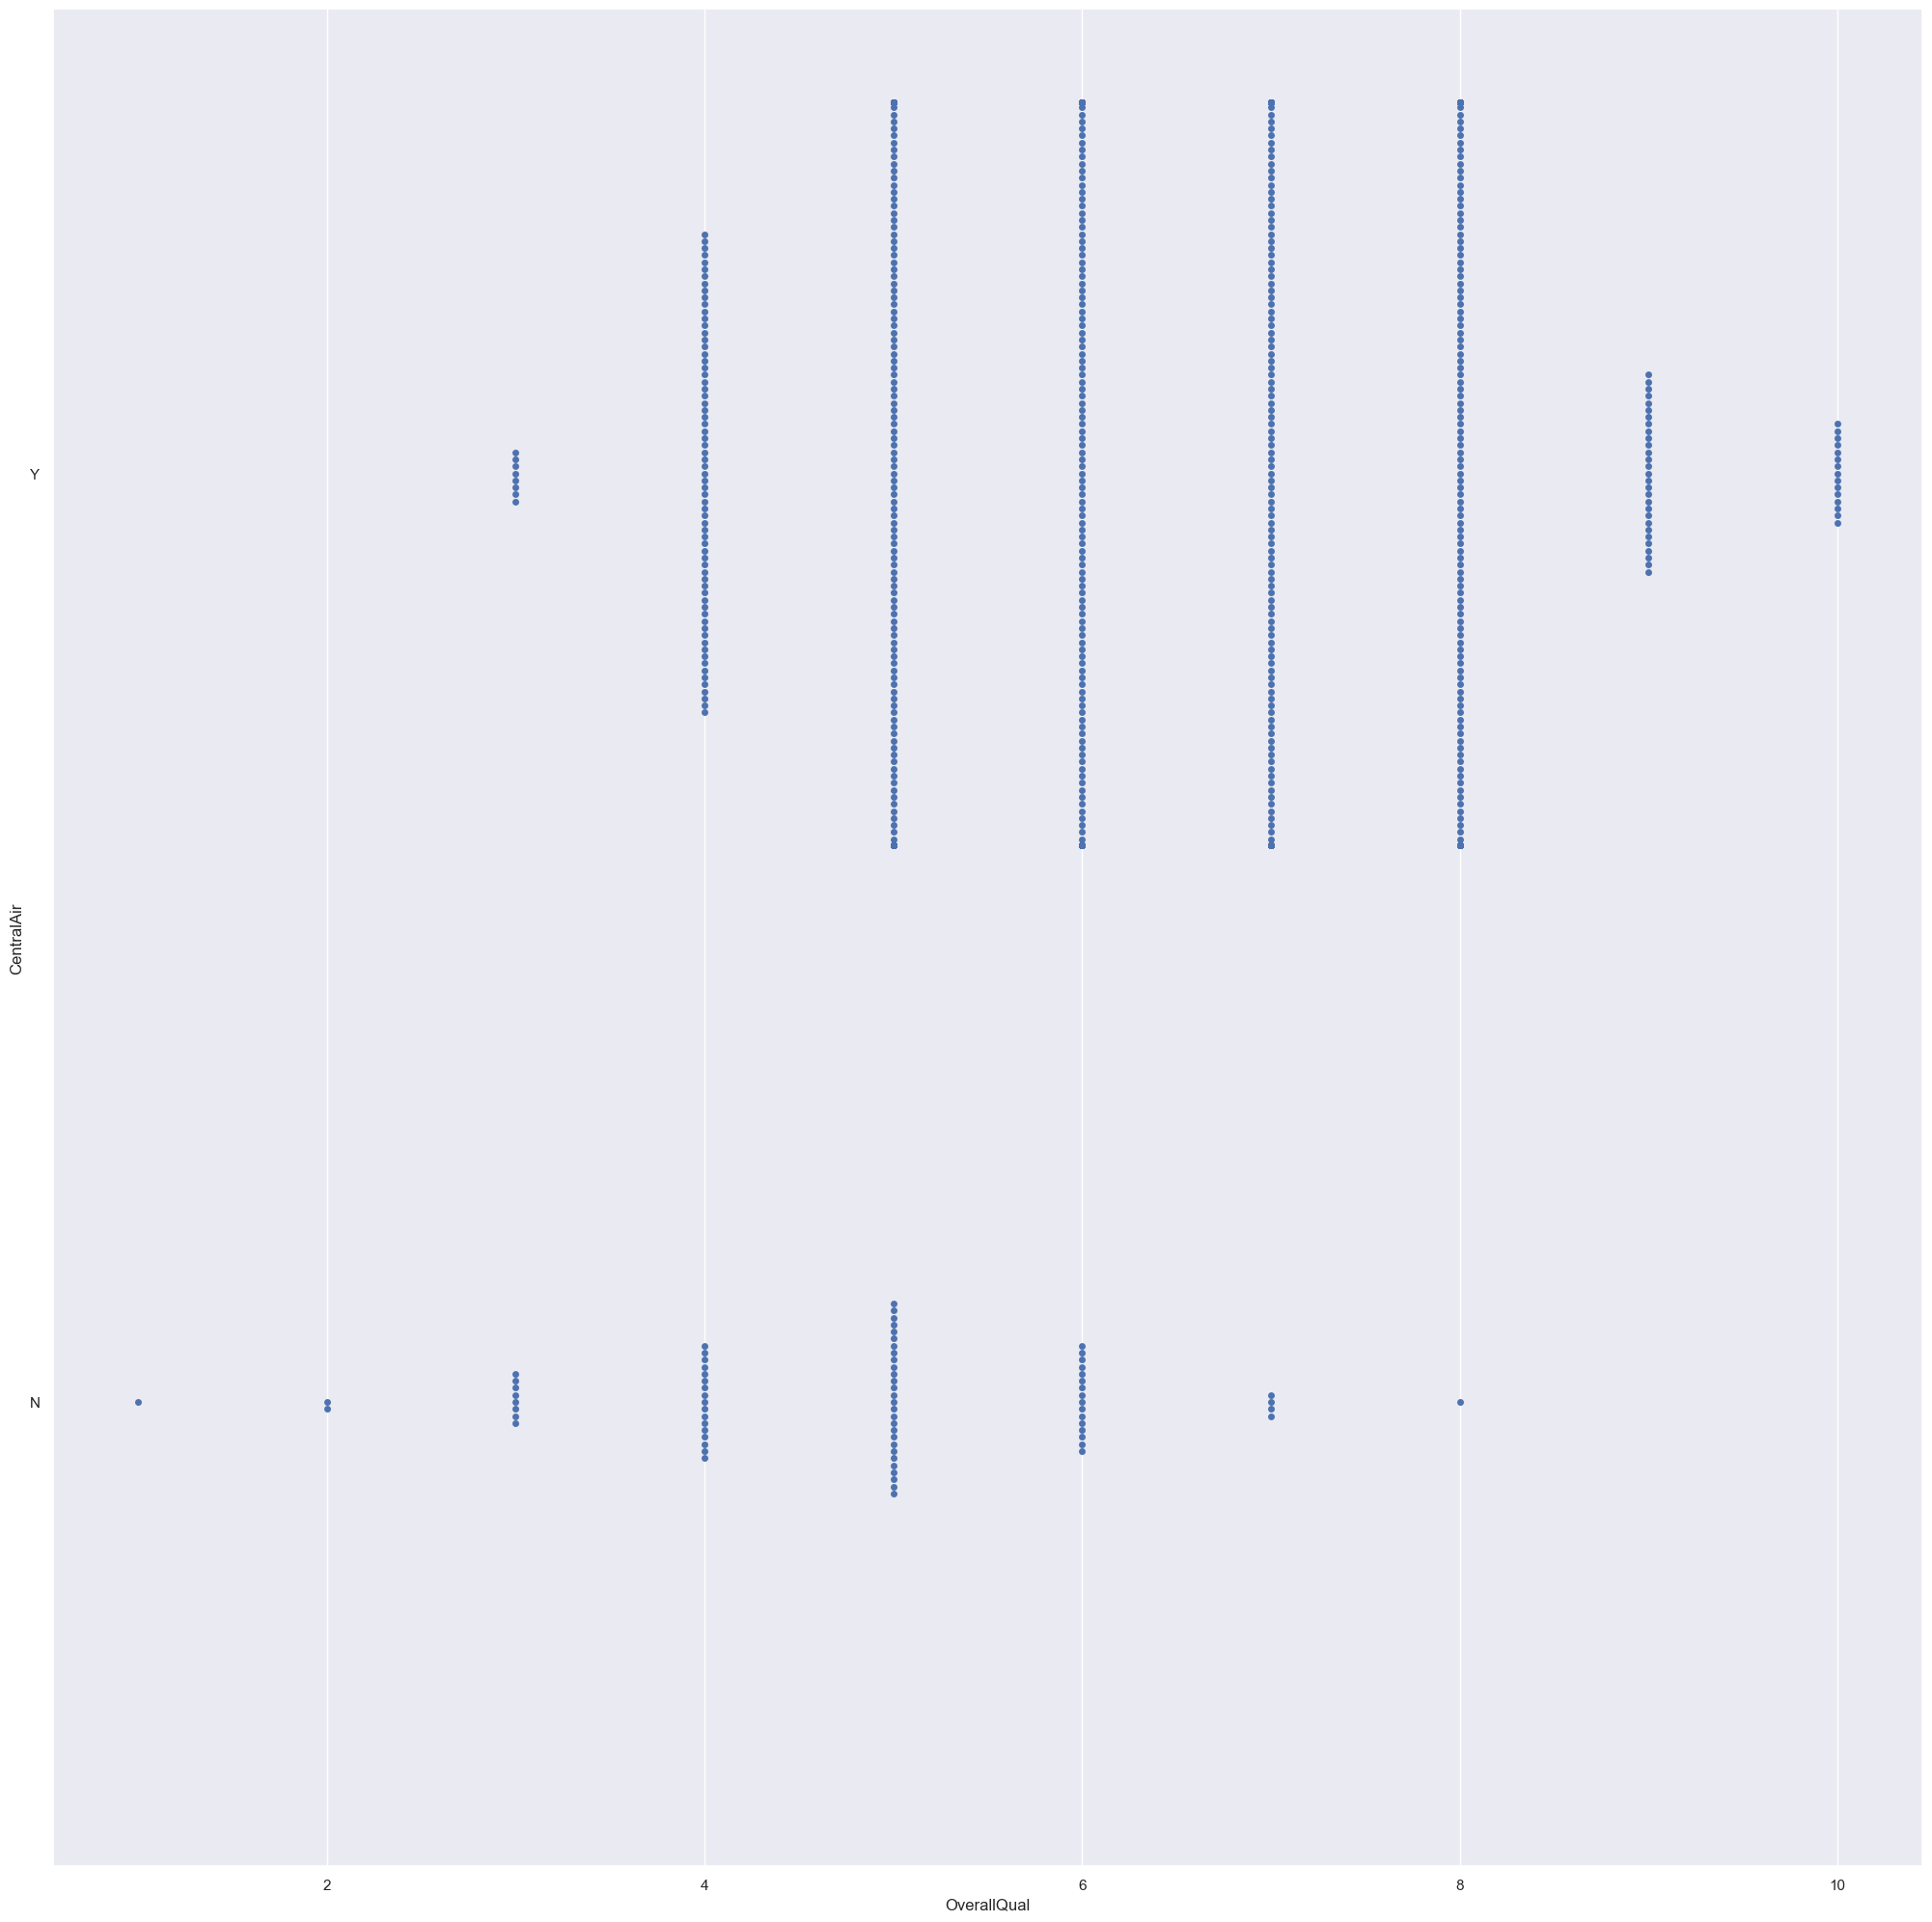

In [14]:
# Create a joint dataframe by concatenating OverallQual and centair
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Joint Swarmplot of OverallQual Train against Centair Train
f = plt.figure(figsize=(25, 25))
sb.swarmplot(x = "OverallQual", y = "CentralAir", data = trainDF, orient = "h")

### Decision Tree, Confusion Matrix, and Metrics

Classification Accuracy 	: 0.9324200913242009
True Positive Rate 		: 0.9921414538310412
False Positive Rate 		: 0.8571428571428571
F1-score 		: 0.9646609360076409

Classification Accuracy 	: 0.9616438356164384
True Positive Rate 		: 0.9971181556195965
False Positive Rate 		: 0.7222222222222222
F1-score 		: 0.9801699716713881



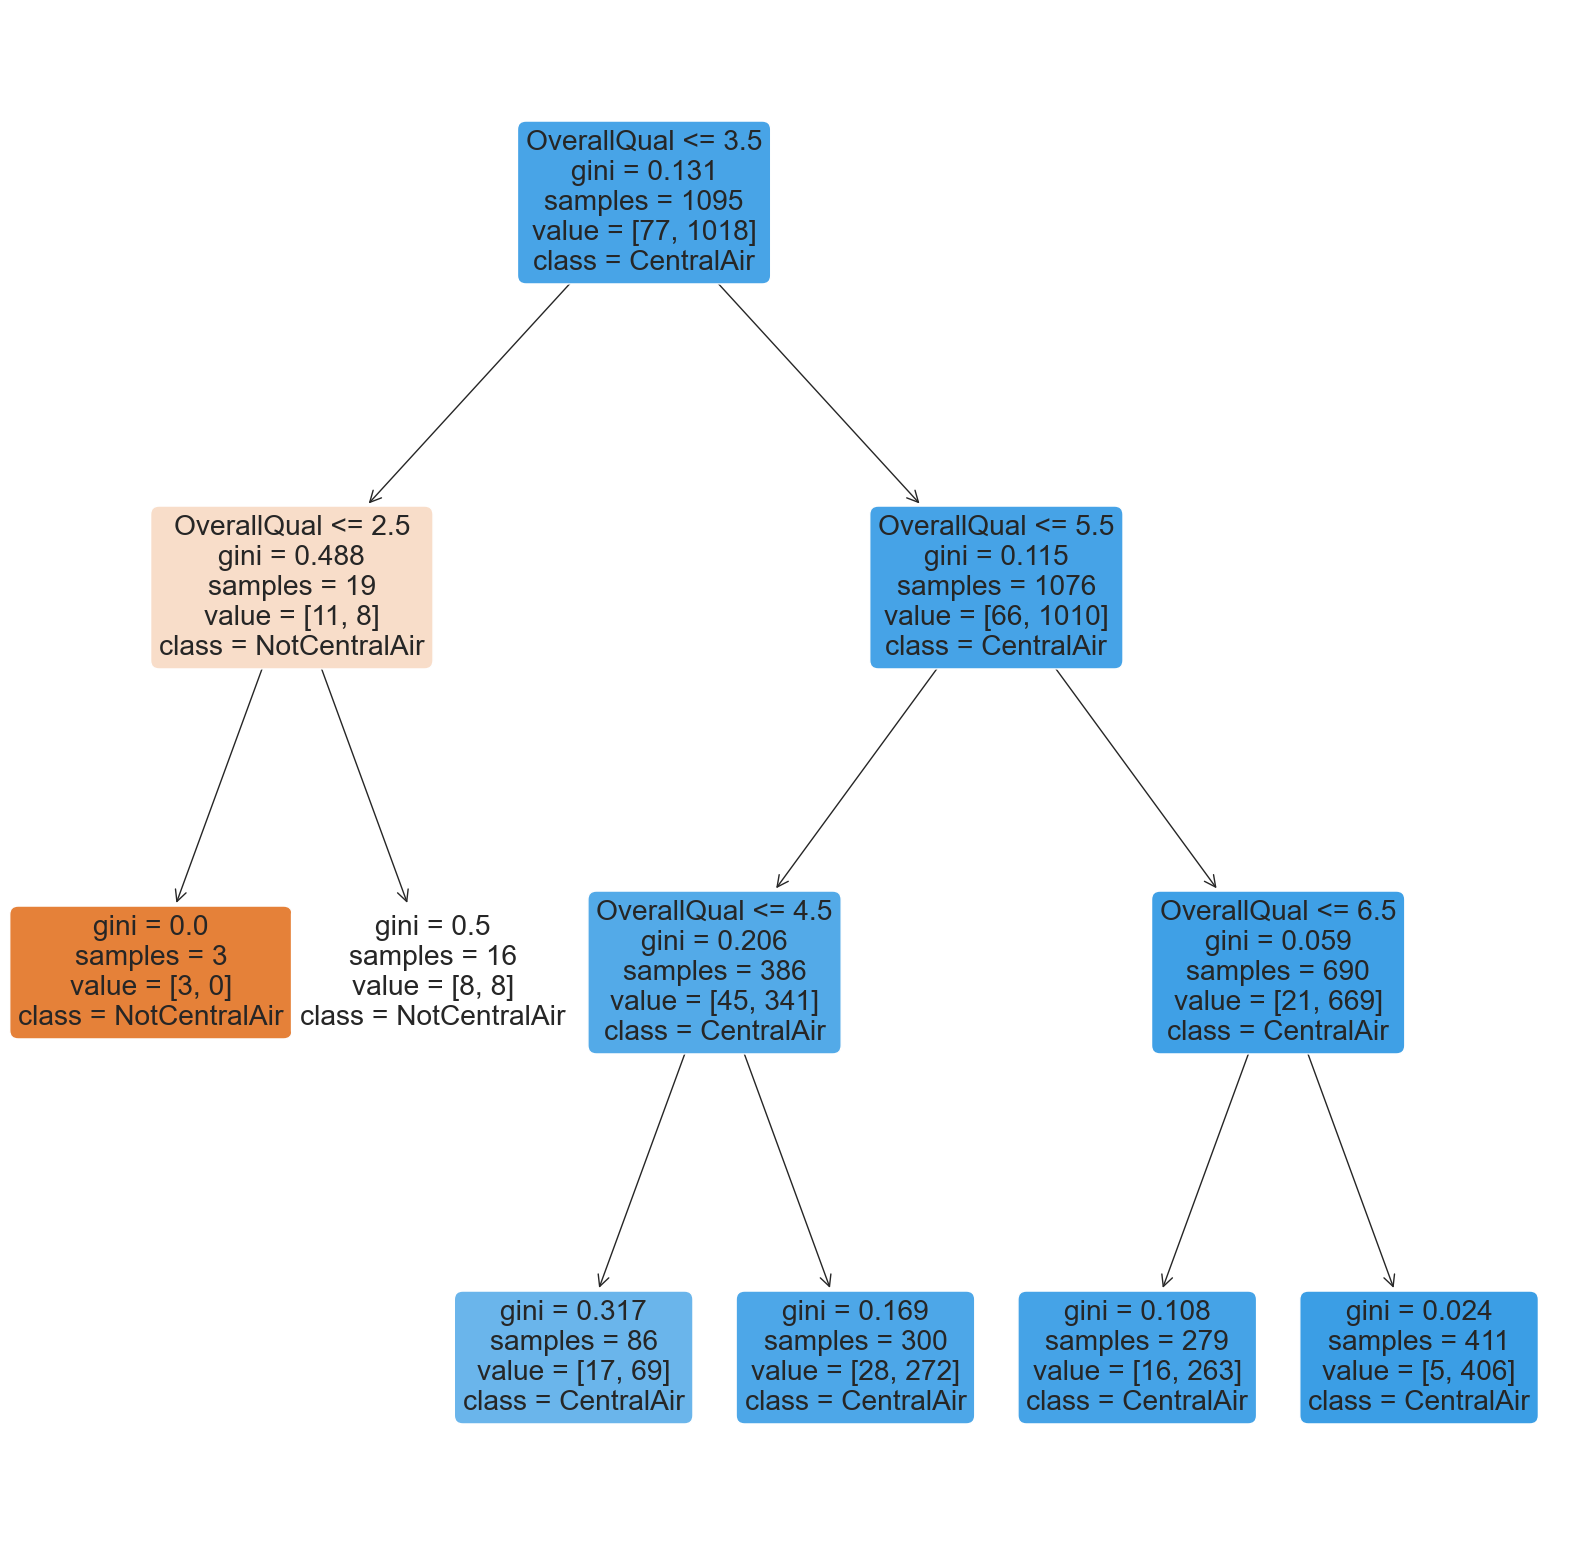

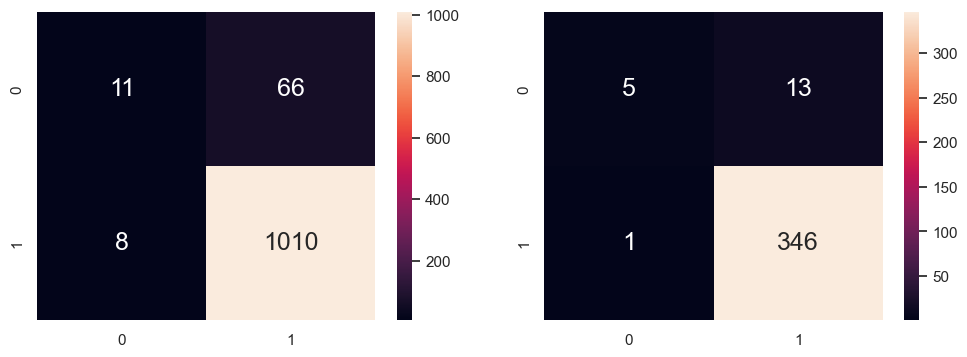

In [15]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)      # train the decision tree model

# Predict CentralAir values corresponding to OverallQual
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree

f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["NotCentralAir","CentralAir"])

# Plot the Confusion Matrix for Train and Test
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

TN_train = cm_train[0][0]
TP_train = cm_train[1][1]
FN_train = cm_train[1][0]
FP_train = cm_train[0][1]

TN_test = cm_test[0][0]
TP_test = cm_test[1][1]
FN_test = cm_test[1][0]
FP_test = cm_test[0][1]

# Train Data
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t\t:", FP_train/(FP_train + TN_train))
print("F1-score \t\t:", 2*TP_train/(2*TP_train + FP_train + FN_train))

print()

# Test Data
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t\t:", FP_test/(FP_test + TN_test))
print("F1-score \t\t:", 2*TP_test/(2*TP_test + FP_test + FN_test))
print()

## YearBuilt

### Data Visualization

In [56]:
y = pd.DataFrame(train["CentralAir"]) #response
X = pd.DataFrame(train["YearBuilt"])#predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<Axes: >

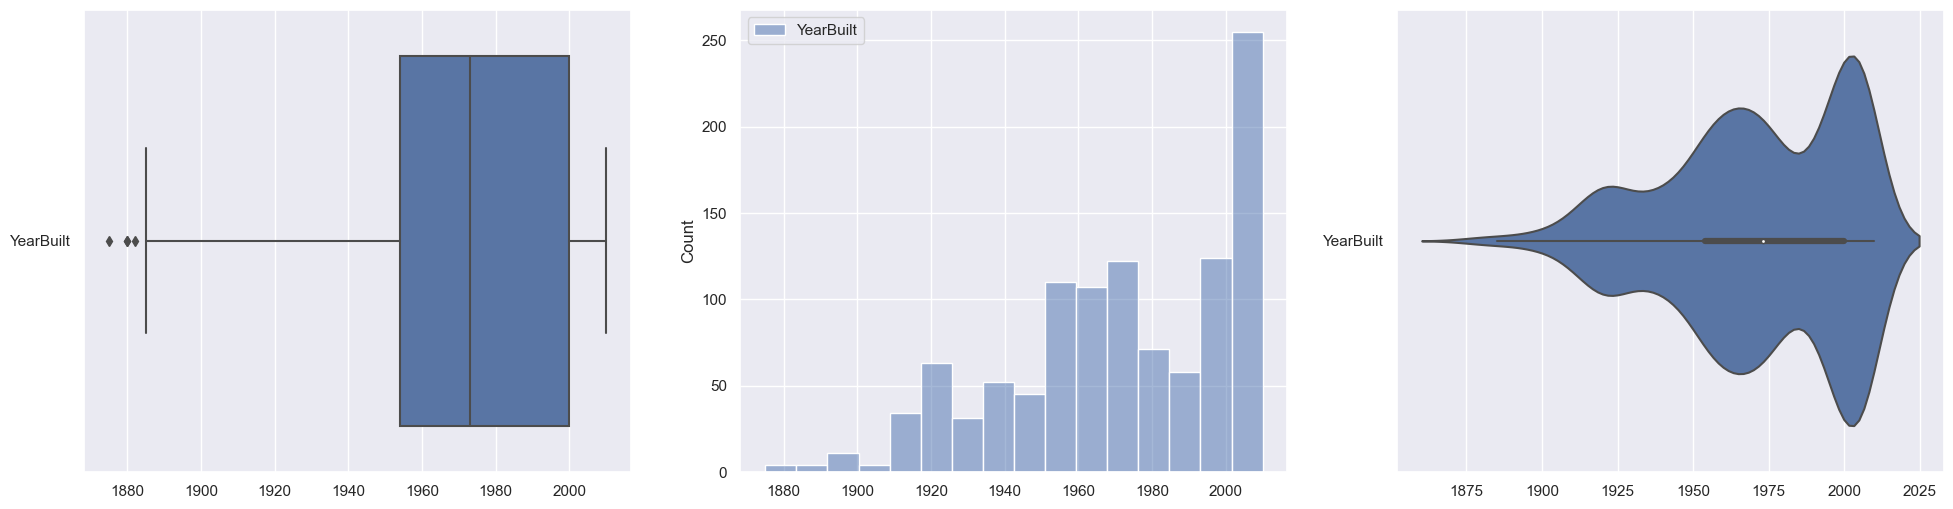

In [57]:
# Plot the distributions of YearBuilt Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = X_train, orient = "h", ax = axes[0])
sb.histplot(data = X_train, ax = axes[1])
sb.violinplot(data = X_train, orient = "h", ax = axes[2])

<Axes: xlabel='YearBuilt', ylabel='CentralAir'>

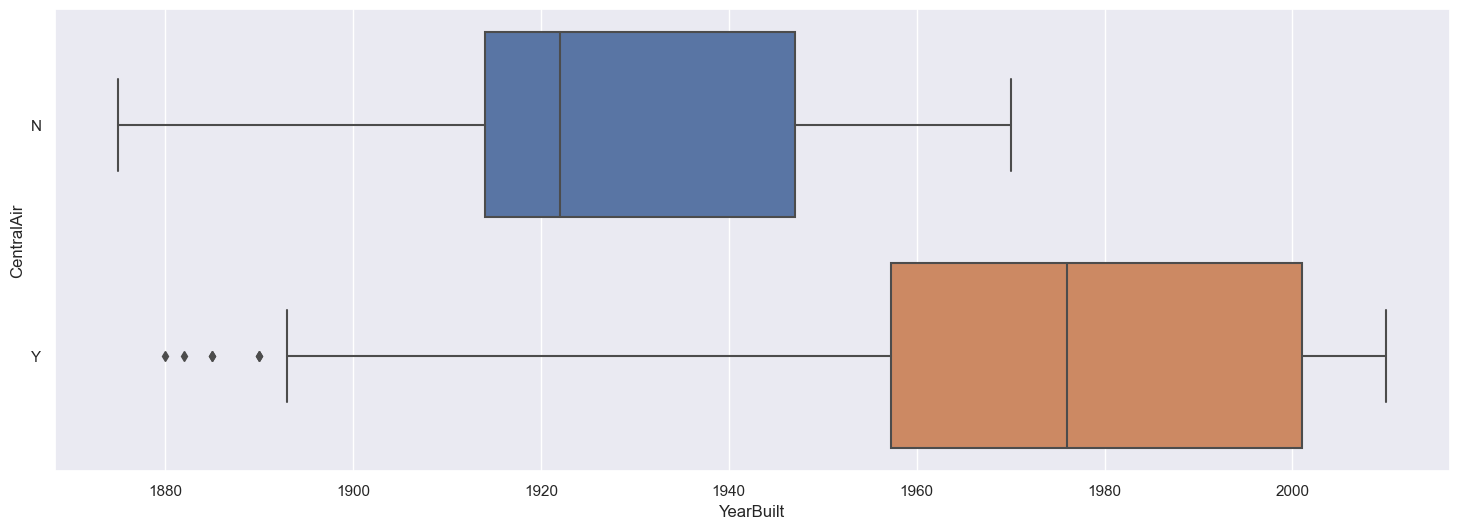

In [58]:
# Create a joint dataframe by concatenating YearBuilt and centralair
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Joint Boxplot of YearBuilt Train against centralair Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = trainDF, orient = "h")

<Axes: xlabel='YearBuilt', ylabel='CentralAir'>

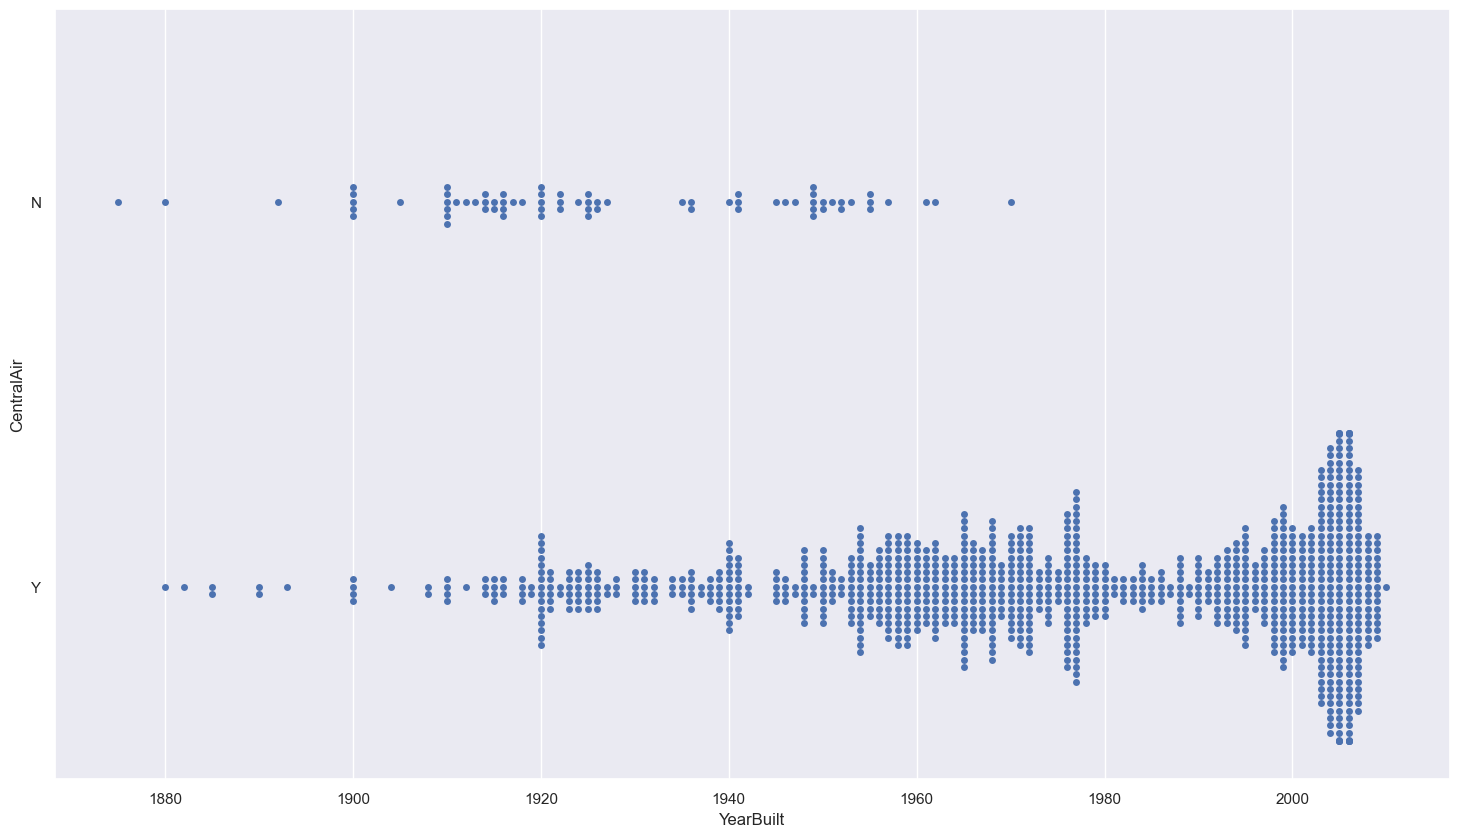

In [59]:
# Create a joint dataframe by concatenating YearBuilt and centair
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Joint Swarmplot of YearBuilt Train against Centair Train
f = plt.figure(figsize=(18, 10))
sb.swarmplot(x = "YearBuilt", y = "CentralAir", data = trainDF, orient = "h")

### Decision Tree, Confusion Matrix, and Metrics

Classification Accuracy 	: 0.9360730593607306
True Positive Rate 		: 0.9774951076320939
False Positive Rate 		: 0.6438356164383562
F1-score 		: 0.9661508704061895

Classification Accuracy 	: 0.9178082191780822
True Positive Rate 		: 0.9620991253644315
False Positive Rate 		: 0.7727272727272727
F1-score 		: 0.9565217391304348



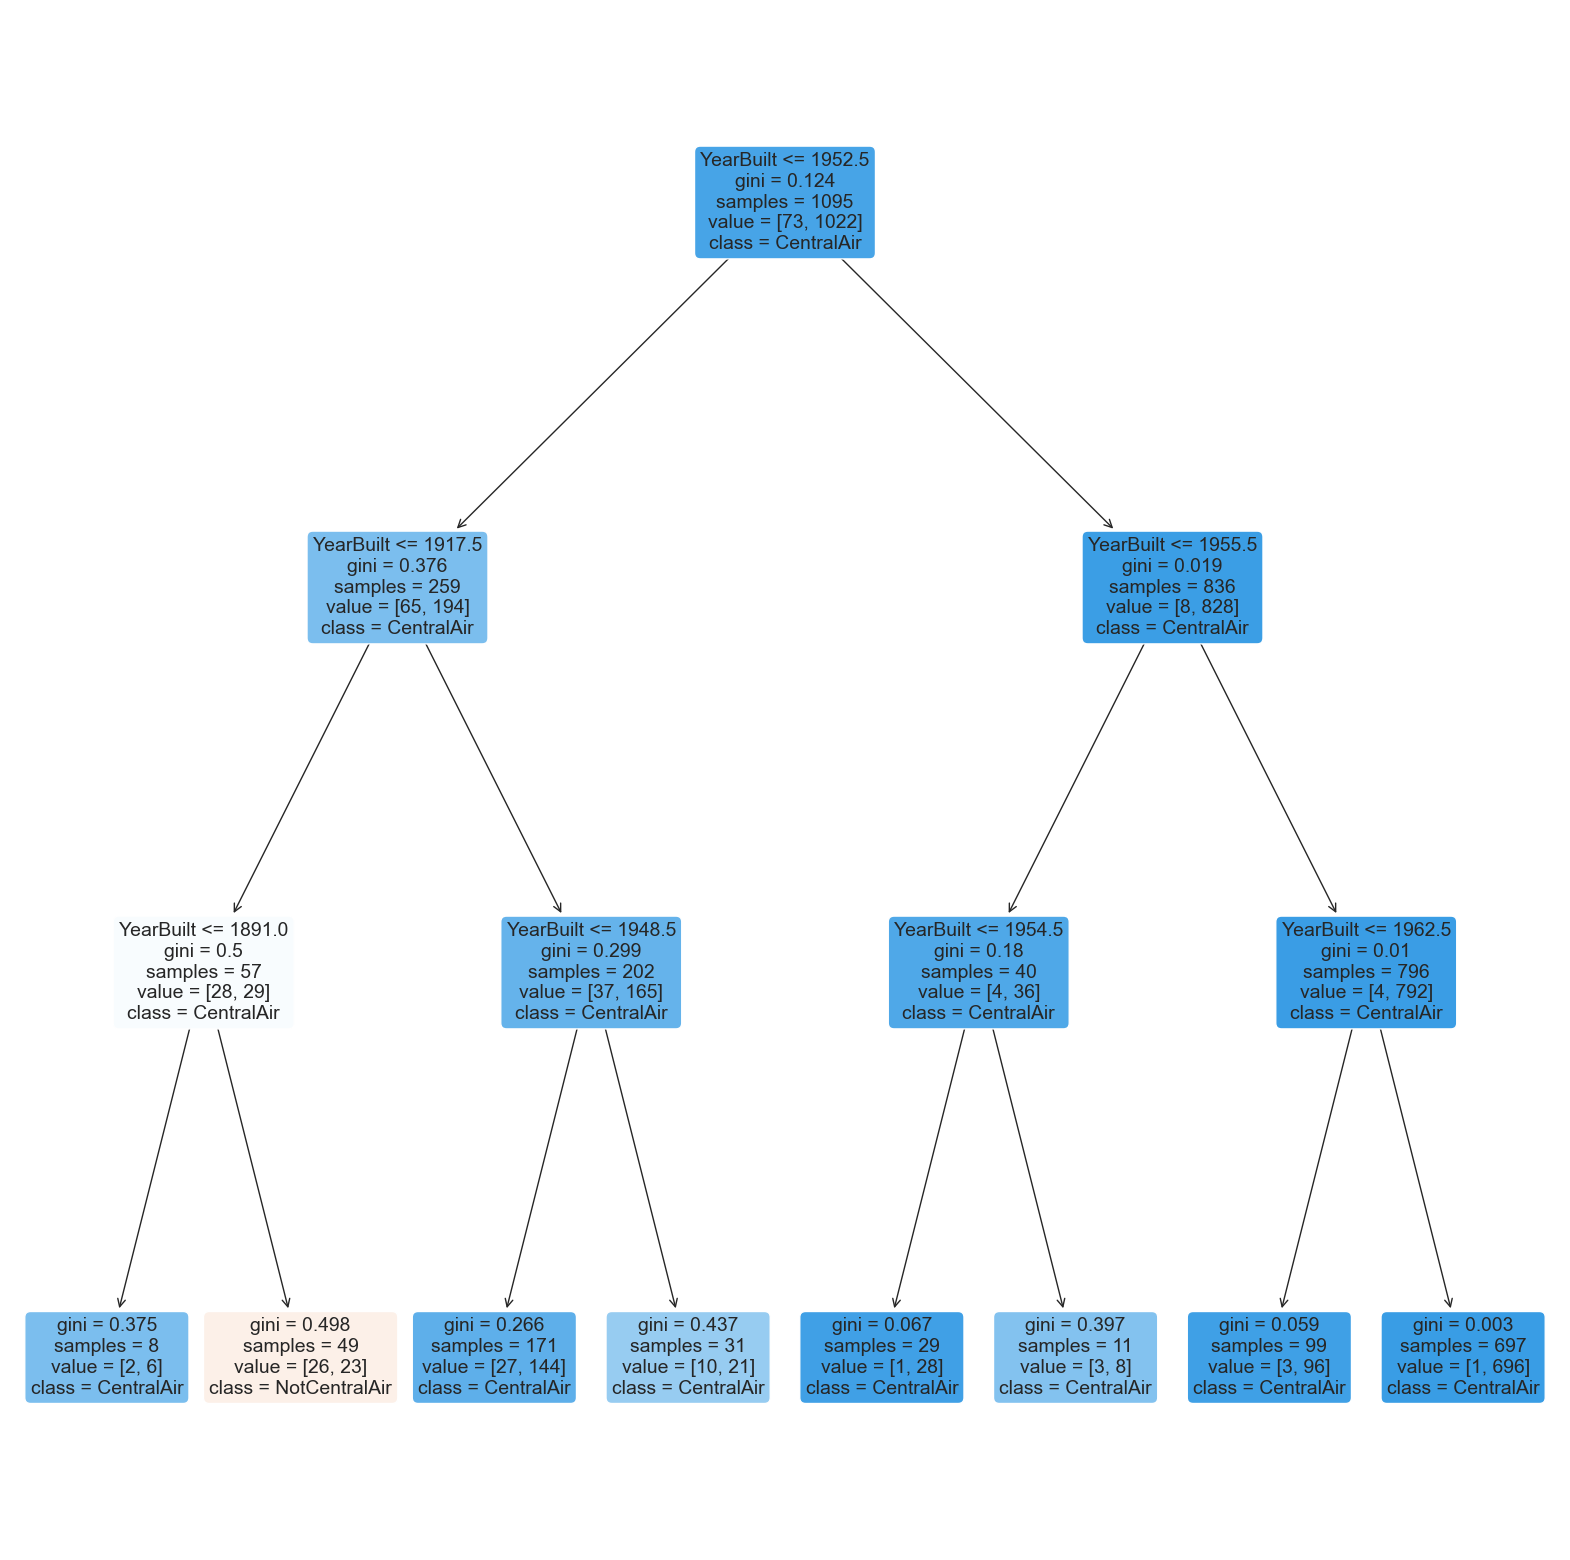

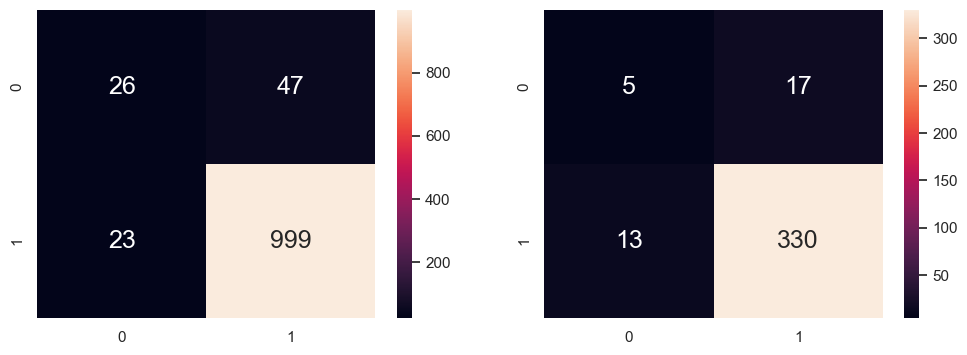

In [60]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)      # train the decision tree model

# Predict CentralAir values corresponding to YearBuilt
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree

f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["NotCentralAir","CentralAir"])

# Plot the Confusion Matrix for Train and Test
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

TN_train = cm_train[0][0]
TP_train = cm_train[1][1]
FN_train = cm_train[1][0]
FP_train = cm_train[0][1]

TN_test = cm_test[0][0]
TP_test = cm_test[1][1]
FN_test = cm_test[1][0]
FP_test = cm_test[0][1]

# Train Data
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", TP_train/(TP_train + FN_train))
print("False Positive Rate \t\t:", FP_train/(FP_train + TN_train))
print("F1-score \t\t:", 2*TP_train/(2*TP_train + FP_train + FN_train))
print()

# Test Data
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", TP_test/(TP_test + FN_test))
print("False Positive Rate \t\t:", FP_test/(FP_test + TN_test))

print("F1-score \t\t:", 2*TP_test/(2*TP_test + FP_test + FN_test))
print()

### Similar to problem 1, by observing the metrics for each model, the conclusion is that OverallQual is the best predictor to predict CentralAir. We can see that for the test data set for OverallQual model has the highest accuracy of 0.962, highest TPR of 0.997, lowest FPR of 0.722, and F1 score highest among the three, F1_score = 0.980.

The details as follows:

SalePrice
    • Classification Accuracy 	: 0.9342465753424658
    • True Positive Rate 		: 0.9910979228486647
    • False Positive Rate 		: 0.75
    • F1-score 		: 0.9653179190751445
    
`OverallQual`
    • Classification Accuracy 	: 0.9616438356164384
    • True Positive Rate 		: 0.9971181556195965
    • False Positive Rate 		: 0.7222222222222222
    • F1-score 		: 0.9801699716713881

    
YearBuilt
    • Classification Accuracy 	: 0.9178082191780822
    • True Positive Rate 		: 0.9620991253644315
    • False Positive Rate 		: 0.7727272727272727
    • F1-score 		: 0.9565217391304348


# Problem 3

In [74]:
centair = pd.DataFrame(train["CentralAir"]) #response
saleprice = pd.DataFrame(train["SalePrice"])#predictor

In [75]:
saleprice_train, saleprice_test, centair_train, centair_test = train_test_split(saleprice, centair, test_size = 0.25)

# Check the sample sizes
print("Train Set :", centair_train.shape, saleprice_train.shape)
print("Test Set  :", centair_test.shape, saleprice_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


<Axes: >

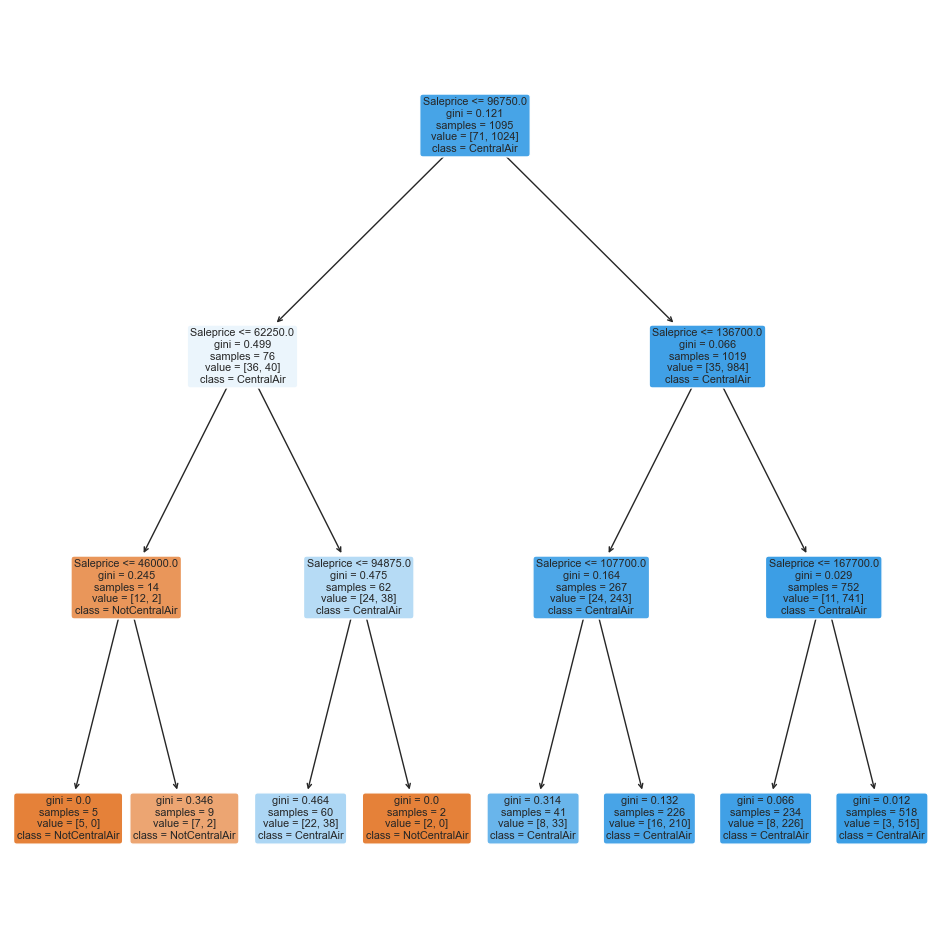

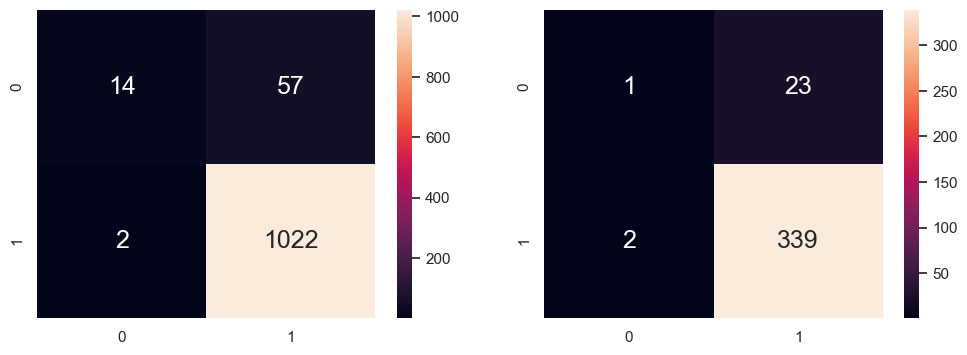

In [76]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(saleprice_train, centair_train)      # train the decision tree model

# Predict CentralAir values corresponding to Total
centair_train_pred = dectree.predict(saleprice_train)
centair_test_pred = dectree.predict(saleprice_test)

# Plot the trained Decision Tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Saleprice"], 
          class_names=["NotCentralAir","CentralAir"])

# Plot the Confusion Matrix for Train and Test
cm_train = confusion_matrix(centair_train, centair_train_pred)
cm_test = confusion_matrix(centair_test, centair_test_pred)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(cm_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## 3A

### By simple obsevation, it can be seen that the leaf node from the rightmost of depth 3. This is because that node results in the prediction of positive (have central air), and there is 22 actual values inside the train set that is actually negative (do not have central air). These values are called the false positives. This specific node with the SalePrice range : 62 250 < SalePrice <= 94 875 has the mose FP according to the tree shown above.

In [77]:
trainDF = pd.concat([saleprice_train, centair_train], axis = 1).reindex(saleprice_train.index)
trainDF = trainDF[(saleprice_train["SalePrice"] > 62250)&(saleprice_train["SalePrice"] <= 94875)]

In [78]:
trainDF.info()
trainDF

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 17 to 325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SalePrice   60 non-null     int64 
 1   CentralAir  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


,SalePrice,CentralAir
17,90000,Y
1432,64500,Y
127,87000,Y
250,76500,Y
1279,68400,Y
431,79900,Y
1378,83000,Y
821,93000,N
1144,80000,N
874,66500,Y


## 3B

In [79]:
trainDF_FP = trainDF[(trainDF["CentralAir"] == 'N')]

In [80]:
trainDF_FP.info()
trainDF_FP

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 821 to 325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SalePrice   22 non-null     int64 
 1   CentralAir  22 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


,SalePrice,CentralAir
821,93000,N
1144,80000,N
676,87000,N
1013,85000,N
98,83000,N
1062,90000,N
1376,91000,N
242,79000,N
1218,80500,N
264,73000,N
